Course 1 Task 1

Name: Jon Hartman

Updated: 2020.07.04

Summary: The objective of this project is to answer the following questions:
* Do customers in different regions spend more per transaction?
* Which regions spend the most/least? Is there a relationship between the number of items purchased and amount spent?


## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import data

In [2]:
!pwd   
!ls

/Users/jonathanhartman/Documents/Data Analytics Class
Coures 1 - Task 1.ipynb              Demographic_Data.numbers
Demographic_Data.csv                 Py Pipeline for EDA - Template.ipynb


In [4]:
data = pd.read_csv('Demographic_Data.csv')
print(data.shape)


(80000, 5)


## Evaluate data

In [5]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [7]:
data.head()

in-store  age  items   amount  region
0         0   37      4   281.03       2
1         0   35      2   219.51       2
2         1   45      3  1525.70       4
3         1   46      3   715.25       3
4         1   33      4  1937.50       1

## Preprocess

### Duplicates

In [8]:
data.duplicated().any()

True

In [9]:
print(data[data.duplicated()].shape)
data[data.duplicated()]
# There are 21 duplicate entries

(21, 5)


in-store  age  items   amount  region
17858         0   76      6   283.61       2
26112         0   67      4   320.41       2
29343         1   23      2  1019.50       4
33834         1   38      3  1993.80       1
34214         1   31      5  1488.10       4
34706         0   39      5  1268.00       4
35971         0   38      7   391.51       2
43958         1   22      1  1303.20       4
44308         1   26      5  1495.70       4
45164         0   79      6   342.28       2
47414         0   27      6  1555.10       4
51600         0   56      2  1941.70       4
52013         1   50      5  1889.40       1
53652         0   29      2   144.43       2
58454         0   76      1   259.44       2
59539         1   49      2  1162.00       4
59859         0   30      7  2535.10       4
61439         1   32      4  1106.10       4
63970         1   42      5  1731.10       4
75506         0   44      2  1756.70       4
78688         1   40      2  1080.60       1

In [10]:
data = data.drop_duplicates()
data.duplicated().any()

False

### Null values

In [11]:
data.isnull().any()
# There are no null entries

in-store    False
age         False
items       False
amount      False
region      False
dtype: bool

In [12]:
data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

### Discretize

* E.g., Amount spent - bin into 0-1000, 1001-2000, 2001+

In [13]:
np.max(data.amount)
# Maximumum amount spent is 3000

3000.0

In [14]:
cut_labels_3 = ['0-1000', '1001-2000', '2000+']
cut_bins = [0,1000,2000,3001]
data['amount_bin'] = pd.cut(data.amount, bins=cut_bins, labels=cut_labels_3)

## Analyze Data
### Statistical Analysis

In [15]:
data.describe()

in-store           age         items        amount        region
count  79979.000000  79979.000000  79979.000000  79979.000000  79979.000000
mean       0.500006     45.758512      4.505133    835.825727      2.674915
std        0.500003     15.715158      2.061250    721.263650      1.126642
min        0.000000     18.000000      1.000000      5.004700      1.000000
25%        0.000000     33.000000      3.000000    285.120000      2.000000
50%        1.000000     45.000000      4.000000    582.140000      3.000000
75%        1.000000     56.000000      6.000000   1233.400000      4.000000
max        1.000000     85.000000      8.000000   3000.000000      4.000000

### Visualizations

In [16]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region', 'amount_bin'], dtype='object')


#### Histogram

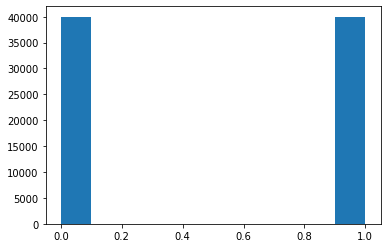

In [17]:
plt.hist(data['in-store'])
plt.show()
# in-store and online purchases are roughly equal, as is also evident from the mean above.

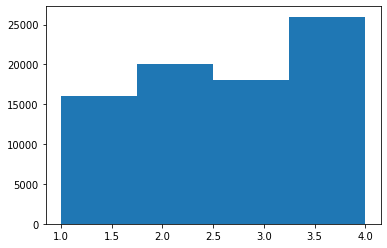

In [18]:
plt.hist(data['region'], bins=4) 
plt.show()
# Region 4 had the most purchases, followed by 2, then 3.

#### Scatter plot

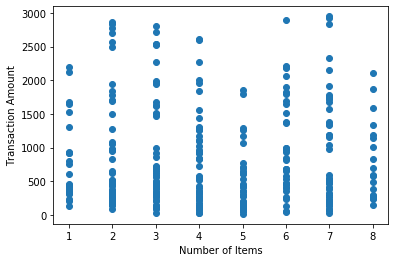

In [19]:
data_sample = data.sample(300)
x = data_sample['items']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.xlabel('Number of Items')
plt.ylabel('Transaction Amount')
plt.show()
# Transaction amounts don't appear to have a clear relationship to the number of items purchased.

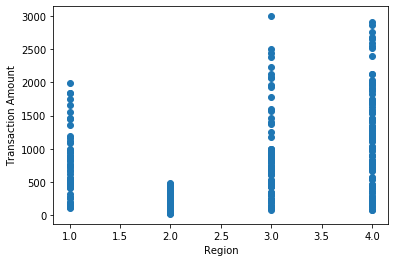

In [20]:
data_sample = data.sample(300)
x = data_sample['region']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.xlabel('Region')
plt.ylabel('Transaction Amount')
plt.show()
# There are clear differences in transaction amounts accross regions.

#### Do these patterns hold within online purchases and in-store purchases taken seperately

In [21]:
data.columns = ['instore', 'age', 'items', 'amount', 'region', 'amount_bin']
online_grouped = data.groupby(data.instore)
Online = online_grouped.get_group(0)
InStore = online_grouped.get_group(1)

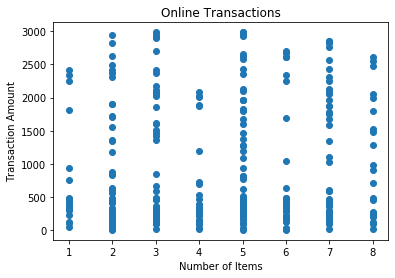

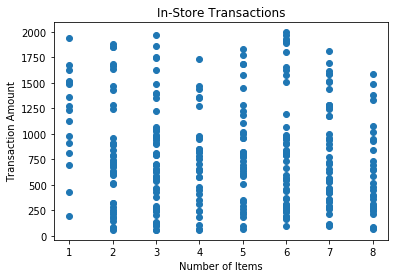

In [22]:
data_sample = Online.sample(300)
x = data_sample['items']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.title('Online Transactions')
plt.xlabel('Number of Items')
plt.ylabel('Transaction Amount')
plt.show()

data_sample = InStore.sample(300)
x = data_sample['items']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.title('In-Store Transactions')
plt.xlabel('Number of Items')
plt.ylabel('Transaction Amount')
plt.show()

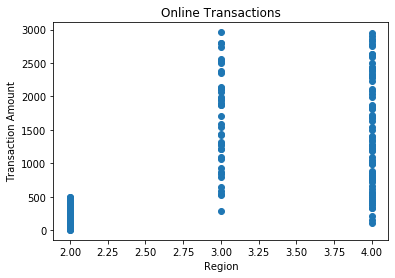

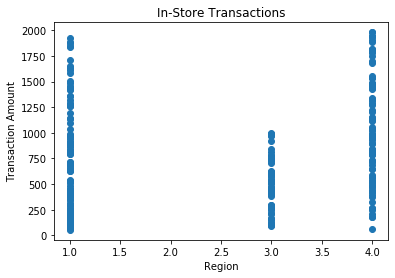

In [23]:
data_sample = Online.sample(250)
x = data_sample['region']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.title('Online Transactions')
plt.xlabel('Region')
plt.ylabel('Transaction Amount')
plt.show()

data_sample = InStore.sample(250)
x = data_sample['region']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.title('In-Store Transactions')
plt.xlabel('Region')
plt.ylabel('Transaction Amount')
plt.show()
# Interestingly there appear to be no online transactions from region 1 and no in-store transactions in region 2.
# Online and in-store transaction amounts are comparable withini region 4, in region 3 in-store transactions are clustered below $1,000 while Online transactions follow a distribution more similar to region 4.

### Summarize Patterns

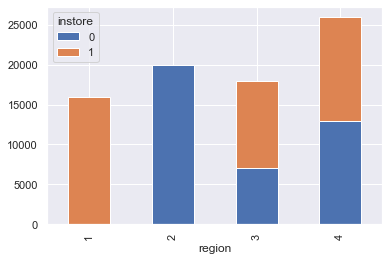

In [38]:
data.groupby('region')['instore']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
# Summary of the number of transactions by region and type (online vs in-store).

#### Box plot

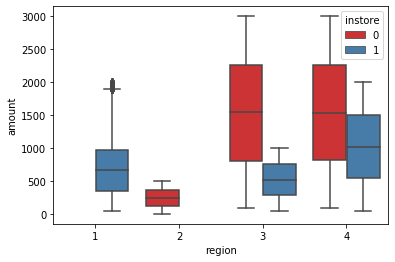

In [26]:
sns.boxplot(x='region', y='amount', hue='instore',data=data, palette="Set1")

# Online orders from regions 3 and 4 are the highest value.

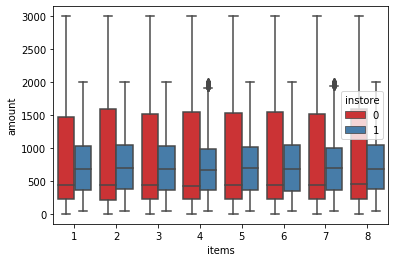

In [27]:
sns.boxplot(x='items', y='amount', hue='instore',data=data, palette="Set1")
# Confirmation that transaction value is unrelated to the number of items purchased.

## Feature Selection

### Correlation

In [39]:
corr_mat = data.corr()
print(corr_mat)
# Further confirmation that region is correlated with transaction amount, but not number of items purchased.
# Age and in-store vs online are also important variables.

          instore       age     items    amount    region
instore  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age     -0.178180  1.000000  0.000657 -0.282033 -0.235370
items   -0.003897  0.000657  1.000000  0.000384 -0.001904
amount  -0.085573 -0.282033  0.000384  1.000000  0.403486
region  -0.133171 -0.235370 -0.001904  0.403486  1.000000


### Covariance

In [40]:
cov_mat = data.cov()
print(cov_mat)

           instore          age     items         amount      region
instore   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age      -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items    -0.004017     0.021270  4.248751       0.570791   -0.004421
amount  -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region   -0.075019    -4.167305 -0.004421     327.874873    1.269321
